#**KLASIFIKASI X-RAY PARU-PARU MANUSIA TERDAMPAK COVID-19**

##**PROBLEM SCOOPING**

**Problem scooping** adalah suatu pemahaman terhadap masalah serta menemukan faktor-faktor yang mempengaruhi masalah tersebut, serta mampu menentukan tujuan *project*.
Konsep **problem scooping** yang digunakan yaitu 4W dimana mampu mengidentifikasi dan memahami masalah dengan cara yang lebih baik dan efisien.
4W sendiri terbagi menjadi *Who*(Siapa), *What*(Apa), *Where*(Dimana), dan *Why*(Mengapa).
**Problem scooping** pada *project* dapat dilihat sebagai berikut.

Who :
- Masyarakat yang terkena dampak covid
- Industri yang tutup produksi
- Tenaga kesehatan yang bekerja lebih ekstra

What :
- Project ini merupakan project yang mengklasifikasikan paru-paru yang terpapar covid 19
- Masih banyak masyarakat yang belum percaya adanya covid,
melalui project ini diharapkan mampu menambah informasi masyarakat seputar covid 19

Where :
- Negara Indonesia

Why :
- Project ini dibuat agar semakin banyak masyarakat yang lebih aware terhadap covid 19
- Dengan sistem ini diharapkan mampu mengurangi kinerja tenaga kesehatan dalam penanganan pasien yang terpapar covid 19

##DATA ACQUISITION & DATA EXPLORATION

**Data Acquisition** adalah proses pengambilan atau pengumpulan data yang akurat untuk digunakan dalam project.
**Data Acquisition** sendiri merupakan langkah kedua dalam *AI cycle*.
Disini kita harus memastikan data yang dikumpulkan berasal dari sumber yang terpercaya.
Kelompok kami menggunakan data set dari *Kaggle* dengan nama Covid19 Image Dataset.

**Data exploration** adalah proses menganalisis dan memvisualisasikan kumpulan data untuk mendapatkan pola awal serta karakteristik tersembunyinya.
Jadi pengguna dapat mengetahui gambaran yang lebih besar terkait data yang digunakan.

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os

In [ ]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

 99% 157M/158M [00:01<00:00, 159MB/s]
100% 158M/158M [00:01<00:00, 144MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/covid19-image-dataset.zip' -d '/content/drive/MyDrive/Covid19-dataset'

Archive:  /content/covid19-image-dataset.zip
replace /content/drive/MyDrive/Covid19-dataset/Covid19-dataset/test/Covid/0100.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/Covid19-dataset/Covid19-dataset/test/Covid/0102.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


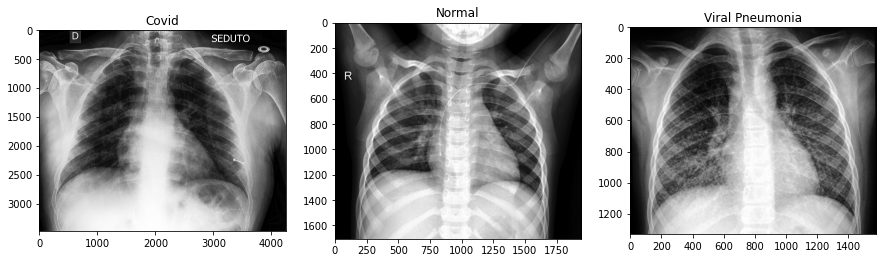

In [ ]:
plt.figure(figsize = (15, 15))
covid_img = cv2.imread('/content/drive/MyDrive/Covid19-dataset/Covid19-dataset/train/Covid/01.jpeg')
normal_img = cv2.imread('/content/drive/MyDrive/Covid19-dataset/Covid19-dataset/train/Normal/01.jpeg')
vp_img = cv2.imread('/content/drive/MyDrive/Covid19-dataset/Covid19-dataset/train/Viral Pneumonia/01.jpeg')
plt.subplot(1, 3, 1)
plt.imshow(covid_img)
plt.title('Covid')
plt.subplot(1, 3, 2)
plt.imshow(normal_img)
plt.title('Normal')
plt.subplot(1, 3, 3)
plt.imshow(vp_img)
plt.title('Viral Pneumonia')
plt.show()

##MODELING

**Modeling** adalah proses di mana model yang berbeda berdasarkan data yang divisualisasikan dapat dibuat dan bahkan diperiksa untuk kelebihan dan kekurangan model.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNetV2, VGG16, VGG19, ResNet50
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
dir_list = sorted(os.listdir('/content/drive/MyDrive/Covid19-dataset/Covid19-dataset/train'))
class_names_lst = [dir_name for dir_name in dir_list]
class_names_lst

['Covid', 'Normal', 'Viral Pneumonia']

In [ ]:
img_generator = ImageDataGenerator(
    rescale = 1. / 255,
    horizontal_flip = True,
    rotation_range = 20,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.1
)
train_data = img_generator.flow_from_directory(
    '/content/drive/MyDrive/Covid19-dataset/Covid19-dataset/train',
    target_size = (255, 255),
    color_mode = 'rgb',
    classes = class_names_lst,
    class_mode = 'categorical',
    batch_size  = 64,
    subset = 'training'
)
valid_data = img_generator.flow_from_directory(
    '/content/drive/MyDrive/Covid19-dataset/Covid19-dataset/train',
    target_size = (255, 255),
    color_mode = 'rgb',
    classes = class_names_lst,
    class_mode = 'categorical',
    batch_size  = 64,
    subset = 'validation'
)
test_generator = ImageDataGenerator(
    rescale = 1. / 255
)
test_data = test_generator.flow_from_directory(
    '/content/drive/MyDrive/Covid19-dataset/Covid19-dataset/train',
    target_size = (255, 255),
    color_mode = 'rgb',
    classes = class_names_lst,
    class_mode = 'categorical',
    batch_size  = 64,
    shuffle = False
)

Found 226 images belonging to 3 classes.
Found 25 images belonging to 3 classes.
Found 251 images belonging to 3 classes.


In [ ]:
base_model = ResNet50(input_shape=(255, 255, 3),
                      include_top=False,
                      weights="imagenet")
base2_model = MobileNetV2(input_shape=(255, 255, 3),
                         include_top=False,
                         weights="imagenet")
base3_model = VGG19(
    input_shape=(255, 255, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False
base2_model.trainable = False
base3_model.trainable = True

In [ ]:
len(base2_model.layers)

154

In [ ]:
fine_tune = 20
for layer in base_model.layers[:fine_tune]:
    layer.trainable = False

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)

In [ ]:
model = keras.Sequential([
    base3_model,
    layers.Flatten(),
    layers.Dense(3, activation = 'softmax')
])
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0003),
    loss = 'categorical_crossentropy',
    metrics = 'accuracy'
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 3)                 75267     
                                                                 
Total params: 20,099,651
Trainable params: 20,099,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    train_data,
    epochs = 300,
    batch_size = 64,
    validation_data = valid_data,
    callbacks = [early_stop]
)

Epoch 1/300
4/4 [==============================] - 33s 7s/step - loss: 2.1135 - accuracy: 0.3274 - val_loss: 1.1045 - val_accuracy: 0.2800
Epoch 2/300
4/4 [==============================] - 15s 4s/step - loss: 1.1024 - accuracy: 0.3894 - val_loss: 1.0838 - val_accuracy: 0.4400
Epoch 3/300
4/4 [==============================] - 15s 4s/step - loss: 1.0864 - accuracy: 0.3982 - val_loss: 1.0755 - val_accuracy: 0.4400
Epoch 4/300
4/4 [==============================] - 15s 4s/step - loss: 1.0830 - accuracy: 0.4425 - val_loss: 1.0954 - val_accuracy: 0.2800
Epoch 5/300
4/4 [==============================] - 15s 4s/step - loss: 1.0889 - accuracy: 0.4159 - val_loss: 1.0705 - val_accuracy: 0.4400
Epoch 6/300
4/4 [==============================] - 15s 3s/step - loss: 1.0586 - accuracy: 0.4425 - val_loss: 1.0537 - val_accuracy: 0.4400
Epoch 7/300
4/4 [==============================] - 15s 3s/step - loss: 1.0029 - accuracy: 0.4425 - val_loss: 0.9480 - val_accuracy: 0.4400
Epoch 8/300
4/4 [==========

In [ ]:
y_hat = model.predict(test_data)

In [ ]:
y_hat_lst = []
for idx in range(y_hat.shape[0]):
    y_hat_lst.append(np.argmax(y_hat[idx]))

In [ ]:
y_hat_cat = []
for val in y_hat_lst:
    y_hat_cat.append(class_names_lst[val])

In [ ]:
true_y_cat = []
for val in test_data.classes:
    true_y_cat.append(class_names_lst[val])

In [ ]:
for i, j in zip(true_y_cat, y_hat_cat):
    print(i, '|', j)

Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid 

##EVALUATION

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_data.classes, y_hat_lst)

0.44223107569721115

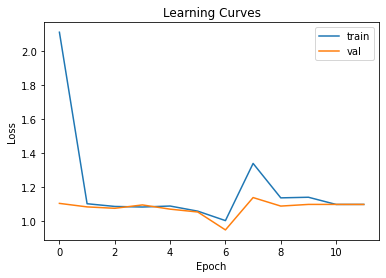

In [ ]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

##SAVE MODEL

In [ ]:
model.save('Covid.h5')